In [108]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error

Populating the interactive namespace from numpy and matplotlib


In [109]:
df = pd.read_csv("processed.cleveland.data", index_col = None, header = None, na_values = '?')
df = df.fillna(0)  # Replace missing values with 0
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [110]:
# Define input and output columns    
data = df.loc[:, 0:12]  
labels = 1.0*(df.loc[:, 13] > 0)

# Featurewise normalization to mean zero and unit standard deviation.
mean = data_train.mean(axis=0)
data_train -= mean
std = data_train.std(axis=0)
data_train /= std
data_test -= mean
data_test /= std

# Split data to train, test and validation sets in 60/20/20 split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=1)

data_train, data_val, labels_train, labels_val = train_test_split(data_train, labels_train, test_size=0.2, random_state=1)

# Split train data for 2 models
partial_data_train = data_train[:100]
partial_labels_train = labels_train[:100]

print(data.shape, labels.shape)

(303, 13) (303,)


# Model testing 

### Model 1 

In [111]:
# Construct the network model
model = Sequential()
model.add(Dense(10, activation='relu',
            input_shape=(data_train.shape[1],)))
#model.add(Dense(64, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=400, batch_size=16, verbose=0,
                    validation_data = (data_val, labels_val))

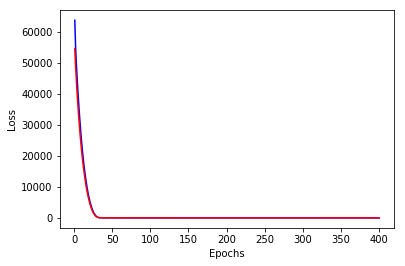

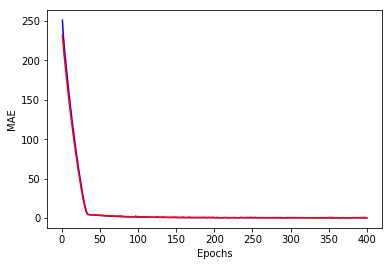

In [112]:
# Plot the loss score and mean absolute error for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)



plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

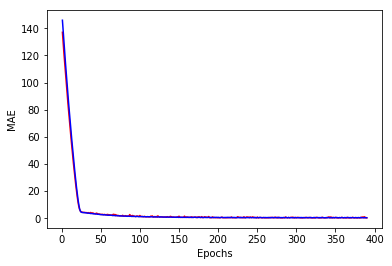

In [113]:
# Cut off the first few MAE data points for clarity

short_mae = mae[10:]
short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

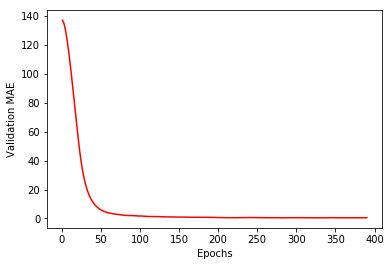

In [114]:
# Smoothen the previous curve to reduce noise

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# The final evaluation with the test data.
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

### Notes
blaablaa<br>

### Model 2 

In [115]:
# Construct the network model
model = Sequential()
model.add(Dense(10, activation='relu',
            input_shape=(data_train.shape[1],)))
#model.add(Dense(64, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=400, batch_size=16, verbose=0,
                    validation_data = (data_val, labels_val))

In [120]:
# Plot the loss score and mean absolute error for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

61/61 [==============================] - 0s 132us/step
Loss:  0.13891003512945332 Test mae score 0.2905633430011937


In [ ]:
# Cut off the first few MAE data points for clarity

short_mae = mae[10:]
short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
# Smoothen the previous curve to reduce noise

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# The final evaluation with the test data.
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

### Notes
blaablaa<br>

### Model 3 

In [ ]:
# Construct the network model
model = Sequential()
model.add(Dense(10, activation='relu',
            input_shape=(data_train.shape[1],)))
#model.add(Dense(64, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_data_train, partial_labels_train,
                    epochs=400, batch_size=16, verbose=0,
                    validation_data = (data_val, labels_val))

In [ ]:
# Plot the loss score and mean absolute error for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
# Cut off the first few MAE data points for clarity

short_mae = mae[10:]
short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
# Smoothen the previous curve to reduce noise

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# The final evaluation with the test data.
test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

In [ ]:
### Notes
blaablaa<br>

## Final model

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu',
            input_shape=(data_train.shape[1],)))
#model.add(Dense(64, activation='relu'))

# 2) This is the same model with L2 regularization
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu',
 #           input_shape=(data_train.shape[1],)))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# 3) This is the same model with dropout
#model.add(Dense(64, activation='relu',
#            input_shape=(data_train.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [2]:
# ... and train it with the entire training data. Select "epochs" from the validation graphs above.
# After that, make the final evaluation with test data.

model.fit(data_train, labels_train, epochs=200, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(data_test, labels_test)
print('Loss: ', test_mse_score, 'Test mae score', test_mae_score)

NameError: name 'model' is not defined

In [ ]:
### Results
blaablaa<br>